In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

<b> Passos para a elaboração do Projeto: </b>

- Descobri qual segmento é mais lucrativo. 
- Transformar os dados categóricos em dados números (apenas os que forem ser utilizados e que façam sentido para o modelo)
- Descontar a margem e os gastos por cada catálogo para verificar se ainda é viavél financeiramente fazer o investimento. 

### Uma observação importante é que iremos adicionar um arquivo com as latitudes e longitudes. Essa informação é interessante para visualizarmos em forma de gráfico espacial. Como demora muito tempo para os pacotes geopandas e geopy gerar as latitudes e longitudes, foi salvo um novo arquivo que será utilizado apenas para plotar esse tipo de gráfico. 


In [2]:
df = pd.read_excel('p1-customers.xlsx', sheet_name=0, header=0)
df

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2
5,Denise Pentico,Store Mailing List,11,3883 Quitman St,Denver,CO,80212,149.01,106,No,1,8
6,Erna Arustamyan,Store Mailing List,12,1965 Yukon St,Lakewood,CO,80214,49.37,108,No,1,7
7,Karen Osborne,Store Mailing List,16,5400 Sheridan Blvd,Arvada,CO,80002,153.97,103,No,3,1
8,Shirley Krywonis,Store Mailing List,17,195 Jade St,Broomfield,CO,80020,173.15,107,No,2,2
9,Dianne Vangilder,Store Mailing List,19,22873 E Clifton Pl,Aurora,CO,80016,105.24,102,No,1,6


Como podemos ver, é um dataframe que nos traz vários tipos de dados que devem ser utilizados para trazer vários insights interessantes. Vamos fazer isso na Análise Exploratória dos Dados. 

Muitos dados são interessantes avaliarmos gráficamente, porém não terá um impacto para a construção do modelo. 

Dados como nome dos clientes, endereço, Estado, Cep, Número da Loja, não vejo relação direta com os produtos do catálogo. Mesmo assim não vamos excluir num primeiro momento. Vamos analisar estatísticamente se tem um nível de 95% de confiança estatística. Caso tenha, podemos testar essa variável dentro do modelo. 


In [3]:
grafico = pd.read_csv('p1_customer_new.csv', sep=',')
grafico

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,latitude,longitude
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,39.709799,-104.918664
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,39.606373,-104.849266
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,39.586606,-104.962399
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,39.777211,-104.830414
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,27.958886,-82.433219
5,Denise Pentico,Store Mailing List,11,3883 Quitman St,Denver,CO,80212,149.01,106,No,1,8,29.783940,-95.332065
6,Erna Arustamyan,Store Mailing List,12,1965 Yukon St,Lakewood,CO,80214,49.37,108,No,1,7,37.759539,-122.442315
7,Karen Osborne,Store Mailing List,16,5400 Sheridan Blvd,Arvada,CO,80002,153.97,103,No,3,1,40.611745,-73.753245
8,Shirley Krywonis,Store Mailing List,17,195 Jade St,Broomfield,CO,80020,173.15,107,No,2,2,40.333600,-78.934396
9,Dianne Vangilder,Store Mailing List,19,22873 E Clifton Pl,Aurora,CO,80016,105.24,102,No,1,6,39.568296,-104.722373


In [4]:
grafico.dropna(inplace=True)

In [5]:
lat = grafico['latitude'][:2375].values
long = grafico['longitude'][:2375].values

mapa5 = folium.Map(location=[39.709799, -104.918664],zoom_start=14)
for la,lo in zip(lat,long):
    folium.Marker([la, lo]).add_to(mapa5)
 
mapa5

In [41]:
mc = folium.plugins.marker_cluster.MarkerCluster(locations=[[lat, long]], popups=grafico['Avg_Sale_Amount'])
mc

ValueError: Expected two (lat, lon) values for location, instead got: [39.70979942492293, 39.6063729, 39.58660597991556, 39.7772109, 27.95888567346939, 29.78394018367347, 37.759539399999994, 40.6117446, 40.333599555555566, 39.56829617908093, 39.64932694251389, 39.64250306218865, 39.742924122448976, 39.7220459, 39.84248628223935, 39.7164592, 42.282342, 39.65607684977113, 39.94070635408437, 39.817865000000005, 39.7787933, 39.65398755, 35.254806, 39.612910869002256, 39.798457510204074, 39.6273904871795, 34.04013870000001, 39.682072999999995, 42.248464055537966, 39.894299172873296, 39.698229234007016, 39.66587665, 42.640442, 40.19606171428571, 39.897944031668615, 32.81658469387755, 39.50994170668575, 35.585692, 39.5879073, 39.711086012048185, 39.74909363254647, 39.65564894466907, 39.758712244897964, 39.69149249929176, 39.714648700000005, 39.74046430325478, 44.0543605, 36.841902000000005, 39.6167412, 39.693062045045, 39.69498225, 25.829760397590366, 39.69871579432718, 41.136845413793104, 44.2613298, 49.2265093, 39.682491145032465, 39.64512072079469, 39.6997335, 39.83426891836735, 52.539703700000004, 39.61664470470545, 39.69276131357452, 39.60820562439918, 39.696005937204475, 39.69348195, 39.83130654723859, 41.049640600000004, 40.771094, 40.549566112466785, 39.81207235424439, 39.83915448973432, 33.9317418, 39.65485591145134, 41.41552822181458, 39.704667, 39.320634999999996, 31.87629676259907, 39.7148059, 39.942551186531894, 39.53809689795918, 39.63088416419386, 39.706564, 39.657515999999994, 39.745821, 39.70698606465765, 39.753394, 34.2516109, 39.69048815, 29.4905222, 39.703327400000006, 39.93133553061225, 39.74662101728974, 36.116414, 40.114137, 42.252148, 39.949414000000004, 46.19927206918547, 39.82792999503005, 31.850939, 39.61615658221779, 39.640686069021456, 42.2823031, 39.78030674272925, 34.673903, 39.62716899398379, 39.692278712778354, 54.59686310000001, 40.5778466, 40.987491999999996, 30.163921999999996, 49.269261, 35.97027266514291, -20.159952800000003, 25.8869102, 28.537339000000003, 40.54454835699188, 39.57880132875381, 39.882075263740454, 39.854215, 39.750114277855566, 39.694362918367354, 39.66847885, 39.76162630854568, 39.88902255, 39.64304330402503, 39.63294666666667, 40.562067, 34.752393, 39.66398625, 40.379343799999994, 39.830641939393935, 39.600956, 39.7369024, 39.91563241666667, 39.66705385, 39.698731455611174, 61.1487318, 39.90164685191212, -33.8192081, 39.857752000000005, 41.454859016067, 39.61708702872353, 38.057733381229696, 39.61024114285714, 39.7369024, 39.69963155, 39.690377000000005, 53.26794640000001, 39.91157078798658, 39.64072682637825, 31.757253273073932, 39.65341827612493, 39.72241862146904, 39.647467, 42.363988899999995, 39.739373721605375, 39.713439525680705, 40.088808, 39.668102000000005, 39.903215, 39.79060285, 39.578602844468186, 39.6805064, 53.3740951, 39.9640265, 39.597314431918036, 44.0543605, 39.68295806914945, 39.66240496806707, 40.280480600956885, 39.666625, 39.622316, -33.841645299999996, 39.698858615782, 39.61654610204081, 39.71603690000001, 33.58979648372179, 39.67057718848197, 41.19306001265215, 39.79391096894665, 39.68251832653061, 50.3681057, 39.6483274, 39.6619289, 39.66072737579104, 41.5860094, 39.89512255102041, 39.84324838383839, 39.663204, 39.67972434227468, 40.605013142857146, 39.84212081433471, 40.682423299999996, 42.30917553535354, 39.6889327, 39.71864545, 39.81153436917851, 39.69371005, 39.93142077743589, 39.70560635, 39.738534444444454, 39.7811612020202, 39.272729999999996, 40.3906213, 39.675819216780994, 39.67807793872613, 39.57066652533574, 39.62713284814636, 39.71287845000001, 39.609176696969705, 39.6988358, 39.848842748003456, 39.7372153, 39.678751727272726, 39.635502, 39.799126832497066, 41.47238322548478, 39.71225711353548, 61.13162040816327, 39.65383685000001, 39.64034133333333, 40.15033433509402, 39.68739586619513, 39.57880132875381, 35.988751, 39.59609667898537, 39.6903033, 39.68648395, 39.7018464, 39.989971000000004, 44.25554508481923, 34.7445912, 36.82298665306123, 39.902978712336854, 40.624275399999995, 39.667569, 40.3743679, 39.631974480531795, 39.0706441, 42.2957323, 39.80869758879243, 53.3482615, 39.80565362626263, 39.61637720408163, -33.819759399999995, 39.80737565306122, 39.941183440840966, 39.68438085569611, 39.64644410526316, 39.687946306776865, 34.724853555555555, 39.63592504652604, 39.932513561383864, 39.716185625, 39.65147785714286, 39.83549014772685, 39.64681702439025, 39.505359909090906, 39.74533306037205, 39.89442407591979, 39.750611410285366, 39.6688329, 39.8245351878453, 34.96523629642124, 39.62371351219512, 39.65647306109836, 39.830578592964834, 39.018711568421054, 39.83015182105853, 39.57015387890301, 39.688992536894844, 32.7930356, 49.240454299999996, 25.88352640404041, 39.65035952, 39.73732760107673, 55.1885971, 39.670956020758084, 39.679156417741844, -33.844074600000006, 39.8503021738856, 35.054204225004035, 40.027653, 39.70701225000001, 42.3382945, 36.0537867, 39.71820381093636, 41.57729058971482, 39.6950463, 39.7591851, 39.651894916666656, 39.74926179591837, 39.61519070619968, 44.0745096, 39.67558162019769, 30.296241, 39.645593346938774, 39.866243, 39.649413656106404, 39.6877304, 39.75146130434783, 39.95256573543945, 39.657688539367854, 39.804107239532904, 40.683099299999995, 39.75733115789474, 39.66993936820856, 41.8173378, 39.68981322, 39.688649306649104, 53.578975199999995, 39.74971393877553, 44.0543605, 42.363988899999995, 53.411336399999996, 41.5445638, 39.703590999999996, 39.57786840397112, 39.786684773869354, 39.678459000000004, 42.363988899999995, 39.509534929369885, 34.256626700000005, 39.869022412911185, 49.2366229, 39.66192645, 34.00332555102041, 39.848066645724245, 39.708873, 39.631799, 39.815763539880145, 39.86087556275878, 39.688741819415576, 39.6965554, 39.68599814296306, 30.215715399999997, 39.800429862994925, 39.82478630612245, 39.783786, 41.564851145019176, 35.201415857142855, 39.849038484581904, 34.2382133, 39.75682633949047, 39.83165858581523, 39.6323119240531, 39.550747153383305, 34.0112173, 38.9473342, 39.69332644897959, 47.5352557, 39.51291915, 39.71516345000001, 39.675584428571426, 39.674344798306436, 39.6451696212414, 39.71155, 39.650495, 51.505432899999995, 39.59257376249536, 39.70741076644424, 53.3740951, 37.794386700000004, 34.97772271765956, 36.7569776, 27.9613623, 39.680771, 39.60446217181497, 39.6762418034516, 52.472624100000004, 40.66363489473685, 39.912355145519975, 39.88424814285714, 42.354055200000005, 39.664534499999995, 39.822928608695655, 39.707955026651774, 39.670974333333334, 42.93029558165421, 49.240454299999996, 53.464926, 39.7423346947224, 39.679575, 39.579195298245615, 39.665674130388815, 39.61660849672371, 39.637519183015826, 37.2786477, 39.64826653061225, 39.813479979670895, 39.686662939385116, 39.70398192066831, 39.756650735444104, 39.63035766479258, 41.86494201353247, 39.74442905970044, 39.811693857142856, 39.626319787389214, 39.736610224631846, 36.51236055238586, 53.3879936, 40.7464310976658, 39.90573093654636, 39.70548055, 39.70193516445128, 39.89067832236699, 54.9034218, 39.68953321212121, 39.668909763370145, 39.83436641031912, 39.794934714285716, 40.682423299999996, 39.919586728673906, 39.718531366228746, 39.856395, 43.61893842857143, 39.94629166153712, 39.645125, 39.68242375, 40.6025329, 39.6272864489796, 39.9430137, 39.75062631578947, 25.926675600000003, 27.96302785714286, 39.61160835, 44.0745096, 39.73711825, 39.61736079591837, 40.651068, 39.68805326623776, 39.94450079032007, 39.6666749, 39.690415127830356, 37.849408000000004, 39.6435186706478, 39.85001397993639, 53.960869200000005, 39.6284936035553, 53.3740951, 39.617589816326536, 39.59003317228881, 39.9758061, 39.70692455485296, 44.4602872, 39.83720696059153, 34.2516109, 25.887131765306126, 42.273303999999996, 61.192488, 39.68838791666667, 39.868271869544884, 39.709616, 39.70467360000001, 39.633065217927545, 39.69609605, 42.72187687755102, 61.149300113898384, 39.86133256008854, 39.67580930029815, 31.754596999999997, 39.6309927368421, 40.6117446, 39.64269753069821, 39.81125724144081, 39.753074375, 39.69870025, 39.67616979948982, 39.81767869848551, 39.8842676, 41.53705252820513, 39.923475578124645, 33.61040823270473, 39.6710844, 42.44375170000001, 39.61518581936475, 39.71516934845661, 39.803979303030296, 35.5783525, 39.83509794507758, 39.90396795, 39.639872, 34.673903, 39.70256885, 53.4293512, 39.614445452410095, 39.79403397737482, 41.2058524, 39.910861, 39.85135320170747, 42.320578000000005, 39.729818653112716, 39.68953852541485, 39.627363208545844, 39.6858081655236, 39.693684600000005, 39.675810285714284, 39.67719654926219, 39.71925018896738].

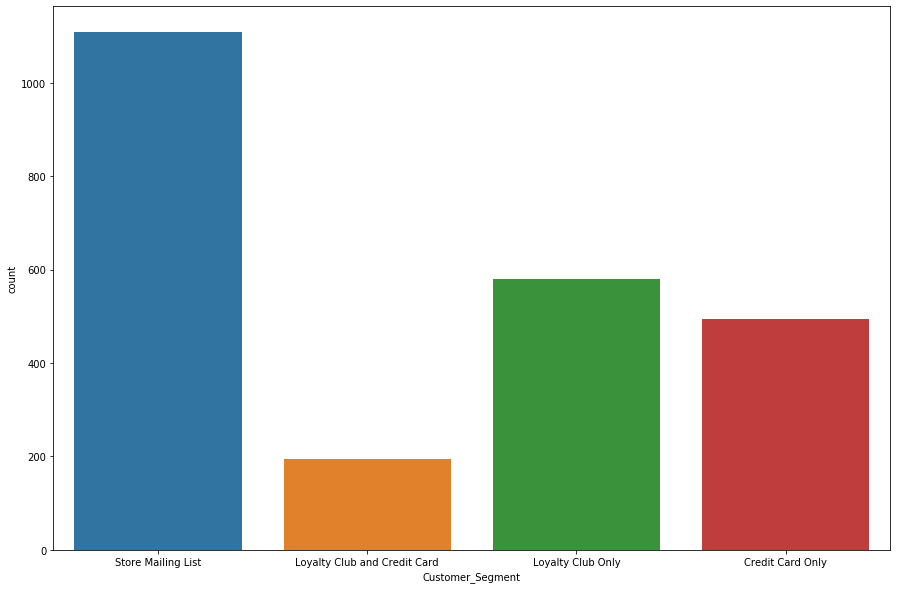

In [6]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Customer_Segment",data=df)


In [7]:
df['Customer_Segment'].value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

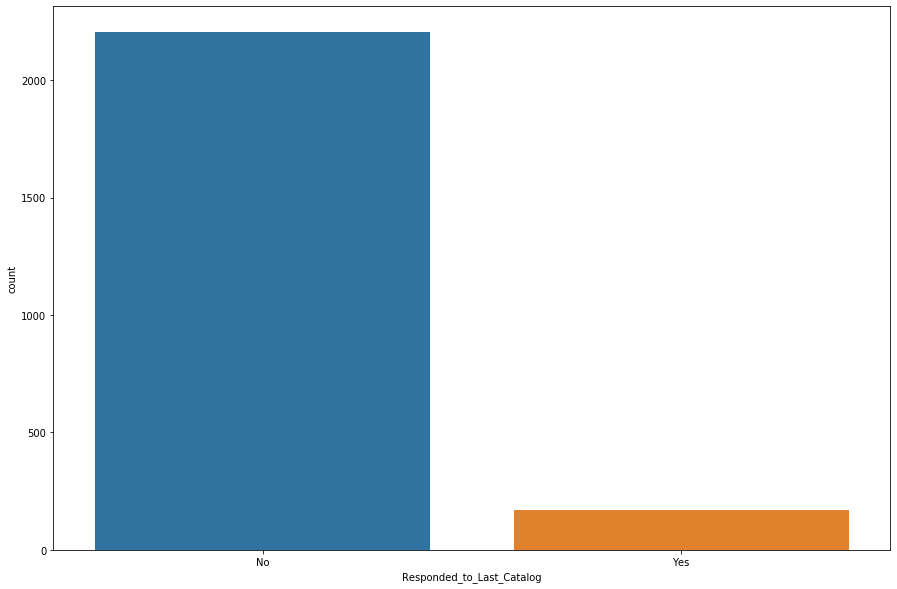

In [8]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Responded_to_Last_Catalog",data=df)

In [9]:
df['Responded_to_Last_Catalog'].value_counts()

No     2204
Yes     171
Name: Responded_to_Last_Catalog, dtype: int64

In [10]:
Responded_to_Last_Catalog = {
    "Yes": 1,
    "No": 0,
}

In [11]:
df.replace(Responded_to_Last_Catalog,inplace=True)
df

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2
5,Denise Pentico,Store Mailing List,11,3883 Quitman St,Denver,CO,80212,149.01,106,0,1,8
6,Erna Arustamyan,Store Mailing List,12,1965 Yukon St,Lakewood,CO,80214,49.37,108,0,1,7
7,Karen Osborne,Store Mailing List,16,5400 Sheridan Blvd,Arvada,CO,80002,153.97,103,0,3,1
8,Shirley Krywonis,Store Mailing List,17,195 Jade St,Broomfield,CO,80020,173.15,107,0,2,2
9,Dianne Vangilder,Store Mailing List,19,22873 E Clifton Pl,Aurora,CO,80016,105.24,102,0,1,6


<Figure size 1296x1080 with 0 Axes>

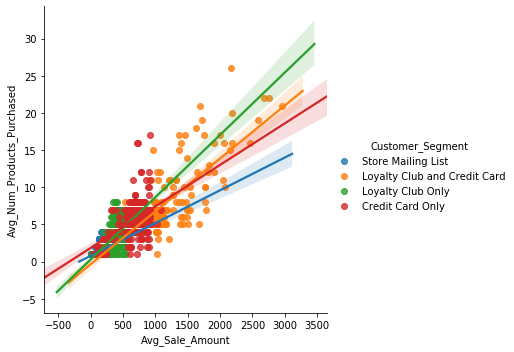

In [12]:
plt.figure(figsize=(18, 15))
sns.lmplot(x='Avg_Sale_Amount',y='Avg_Num_Products_Purchased',data=df, hue='Customer_Segment')

<Figure size 1296x1080 with 0 Axes>

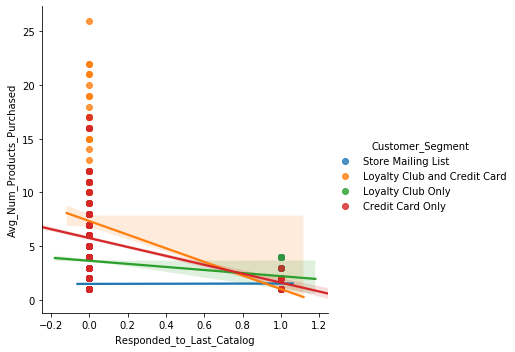

In [13]:
plt.figure(figsize=(18, 15))
sns.lmplot(x='Responded_to_Last_Catalog',y='Avg_Num_Products_Purchased',data=df, hue='Customer_Segment')

In [14]:
codigo_segmento_loja = {
    "Store Mailing List": 4,
    "Loyalty Club Only": 3,
    "Credit Card Only": 2,
    "Loyalty Club and Credit Card": 1
}

In [15]:
df.replace(codigo_segmento_loja,inplace=True)
df

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,4,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6
1,Danell Valdez,4,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6
2,Jessica Rinehart,4,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3
3,Nancy Clark,4,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6
4,Andrea Brun,4,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2
5,Denise Pentico,4,11,3883 Quitman St,Denver,CO,80212,149.01,106,0,1,8
6,Erna Arustamyan,4,12,1965 Yukon St,Lakewood,CO,80214,49.37,108,0,1,7
7,Karen Osborne,4,16,5400 Sheridan Blvd,Arvada,CO,80002,153.97,103,0,3,1
8,Shirley Krywonis,4,17,195 Jade St,Broomfield,CO,80020,173.15,107,0,2,2
9,Dianne Vangilder,4,19,22873 E Clifton Pl,Aurora,CO,80016,105.24,102,0,1,6


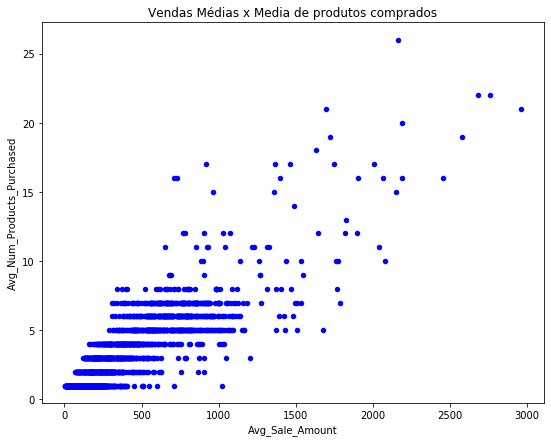

In [16]:
df.plot(x='Avg_Sale_Amount',y='Avg_Num_Products_Purchased',kind='scatter', title='Vendas Médias x Media de produtos comprados',color='b',figsize=(9,7))

<Figure size 1296x1080 with 0 Axes>

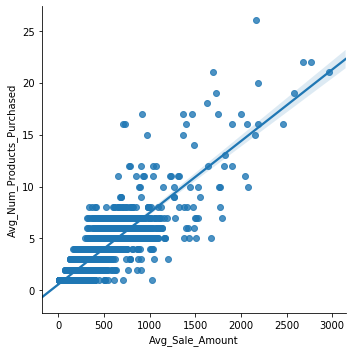

In [17]:
plt.figure(figsize=(18, 15))
sns.lmplot(x='Avg_Sale_Amount',y='Avg_Num_Products_Purchased',data=df)

In [18]:
df['Customer_Segment'].value_counts()

4    1108
3     579
2     494
1     194
Name: Customer_Segment, dtype: int64

In [29]:
df1 = pd.read_excel('p1-customers.xlsx', sheet_name=0, header=0)

In [30]:
df1 = pd.get_dummies(df1, columns=['Customer_Segment'], dtype='float64')
df1

,Name,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,Pamela Wright,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0.0,0.0,0.0,1.0
1,Danell Valdez,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0.0,0.0,0.0,1.0
2,Jessica Rinehart,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0.0,0.0,0.0,1.0
3,Nancy Clark,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,0.0,0.0,0.0,1.0
4,Andrea Brun,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,0.0,0.0,0.0,1.0
5,Denise Pentico,11,3883 Quitman St,Denver,CO,80212,149.01,106,No,1,8,0.0,0.0,0.0,1.0
6,Erna Arustamyan,12,1965 Yukon St,Lakewood,CO,80214,49.37,108,No,1,7,0.0,0.0,0.0,1.0
7,Karen Osborne,16,5400 Sheridan Blvd,Arvada,CO,80002,153.97,103,No,3,1,0.0,0.0,0.0,1.0
8,Shirley Krywonis,17,195 Jade St,Broomfield,CO,80020,173.15,107,No,2,2,0.0,0.0,0.0,1.0
9,Dianne Vangilder,19,22873 E Clifton Pl,Aurora,CO,80016,105.24,102,No,1,6,0.0,0.0,0.0,1.0


In [21]:
df1.columns

Index(['Name', 'Customer_ID', 'Address', 'City', 'State', 'ZIP',
       'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', '#_Years_as_Customer',
       'Customer_Segment_1', 'Customer_Segment_2', 'Customer_Segment_3',
       'Customer_Segment_4'],
      dtype='object')

In [22]:
df1.dtypes

Name                           object
Customer_ID                     int64
Address                        object
City                           object
State                          object
ZIP                             int64
Avg_Sale_Amount               float64
Store_Number                    int64
Responded_to_Last_Catalog       int64
Avg_Num_Products_Purchased      int64
#_Years_as_Customer             int64
Customer_Segment_1            float64
Customer_Segment_2            float64
Customer_Segment_3            float64
Customer_Segment_4            float64
dtype: object

In [31]:
import statsmodels.api as sm

In [32]:
X = df1[['Customer_Segment_Credit Card Only', 'Customer_Segment_Loyalty Club Only', 'Customer_Segment_Loyalty Club and Credit Card', 'Customer_Segment_Store Mailing List', 'Avg_Num_Products_Purchased']]
y = df1['Avg_Sale_Amount']


In [33]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        23:49:56   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           220.1838      6.113     36.022      0.000     208.197     232.170
Customer_Segment_Credit Card Only                83.2796      6.326     13.165      0.000      70.875      95.685
Customer_Segment_Loyalty Club Only              -66.0761      5.196    -12.716      0.000     -76.266     -55.886
Customer_Segment_Loyalty Club and Credit Card   365.1184      9.853     37.058      0.000     345.798     384.439
Customer_Segment_Store Mailing List            -162.1381      5.297    -30.610      0.000    -172.525    -151.751
Avg_Num_Products_Purchased                       66.9762      1.515     44.208      0.000      64.005      69.947
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                     1.42e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
dft = pd.read_excel('p1-mailinglist.xlsx', sheet_name=0, header=0)
dft

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706
5,Amanda Donahoe,Credit Card Only,1946,10093 E Warren Ave,Denver,CO,80247,105,7,0.7,0.732722,0.267278
6,Amanda Huerta,Loyalty Club and Credit Card,1212,3889 Aldenbridge Cir,Highlands Ranch,CO,80126,101,4,1.0,0.778261,0.221739
7,Angie Reffel,Credit Card Only,369,4502 S Buckley Way,Aurora,CO,80015,104,6,0.2,0.806553,0.193447
8,Anh Tran,Credit Card Only,1683,7328 E Maple Ave,Denver,CO,80230,100,6,0.0,0.749342,0.250658
9,Anna Crumrine,Loyalty Club Only,1940,7354 S Catawba Way,Aurora,CO,80016,102,4,0.9,0.735477,0.264523


In [35]:
dft = pd.get_dummies(dft, columns=['Customer_Segment'], prefix=['Customer_Segment'], dtype='float64')
dft

,Name,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,A Giametti,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0.0,1.0,0.0,0.0
1,Abby Pierson,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0.0,0.0,1.0,0.0
2,Adele Hallman,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0.0,1.0,0.0,0.0
3,Alejandra Baird,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0.0,1.0,0.0,0.0
4,Alice Dewitt,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0.0,1.0,0.0,0.0
5,Amanda Donahoe,1946,10093 E Warren Ave,Denver,CO,80247,105,7,0.7,0.732722,0.267278,1.0,0.0,0.0,0.0
6,Amanda Huerta,1212,3889 Aldenbridge Cir,Highlands Ranch,CO,80126,101,4,1.0,0.778261,0.221739,0.0,0.0,1.0,0.0
7,Angie Reffel,369,4502 S Buckley Way,Aurora,CO,80015,104,6,0.2,0.806553,0.193447,1.0,0.0,0.0,0.0
8,Anh Tran,1683,7328 E Maple Ave,Denver,CO,80230,100,6,0.0,0.749342,0.250658,1.0,0.0,0.0,0.0
9,Anna Crumrine,1940,7354 S Catawba Way,Aurora,CO,80016,102,4,0.9,0.735477,0.264523,0.0,1.0,0.0,0.0


In [36]:
dft['Project'] = 220.1838+(dft['Customer_Segment_Loyalty Club Only']*-66.0761)+(dft['Customer_Segment_Loyalty Club and Credit Card']*365.1184)+(dft['Customer_Segment_Store Mailing List']*-162.1381)+(dft['Customer_Segment_Credit Card Only']*83.2796)+(dft['Avg_Num_Products_Purchased']*66.9762)

In [37]:
dft['final'] = dft['Project']*dft['Score_Yes']
dft['final']

0      108.298784
1      466.654470
2      360.609296
3       87.898028
4      163.616717
5      206.418170
6      189.189688
7      136.442259
8      176.793979
9      111.632077
10      36.583587
11     119.321194
12      89.586543
13     177.435547
14     208.295824
15      84.653425
16     113.924306
17      46.893727
18     530.451163
19      96.700155
20     181.626921
21      82.871024
22     151.804934
23      70.033812
24     348.726185
25      69.155750
26     184.935013
27     391.351521
28     536.465381
29     136.053999
          ...    
220    172.491553
221    119.382987
222    407.111011
223    128.996973
224    137.123502
225    363.662489
226    181.376998
227    270.850555
228     56.628887
229     54.694440
230    199.508327
231    107.552684
232    185.260061
233     72.456779
234    202.794137
235    120.683532
236     87.390888
237    730.317585
238    137.575187
239    147.015088
240     80.518040
241    304.738051
242    168.128855
243    181.402963
244     38

In [38]:
dft['final'].sum()

47224.86485806424

In [39]:
agm = (dft['final'].sum())*0.5
agm

23612.43242903212

In [40]:
profit = agm - (6.5*250)
profit

21987.43242903212

<b> Respondendo as hipóteses: </b>

- O segmento mais lucrativo é o Loyalty Club Only (3). É a variável que tem o melhor desempenho, desde as médias de vendas mais baixas, até as mais elevadas, ou seja, é um indicativo claro que a loja deve investir principalmente nesse segmento, pois além de abranger todos os públicos de renda, é a que mais traz resultados para a empresa.
- Não foi necessário a geração de um modelo de classificação, para prever o Score, pois essa informação já nos é fornecida. Mas nada impede que fosse criado um modelo de classificação para prever essa probabilidade. 
- Após descontarmos a margem de 50%, mais 6,50 dólares por catálogo, obtivemos um lucro projetado de 21.987,43 dólares, acima dos 10.000,00 que era o valor mínimo esperado definido pela gerência. 